# Import

In [1]:
import numpy as np
from scipy.stats import norm
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import statistics
from scipy import signal, stats, special
from cycler import cycler
from scipy.optimize import curve_fit

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
%matplotlib inline

In [3]:
def get_plot_data(ax, filename) :
    header = ax.get_xlabel()
    data = ax.lines[0].get_xdata()
    for line in ax.lines :
        header = header + ' ' + line.get_label() 
        data = np.vstack((data,line.get_ydata()))
    data = np.transpose(data)
    np.savetxt(filename+'.dat', data, fmt='%.18e', delimiter=' ', newline='\n', header=header, footer='', comments='# ', encoding=None)
    return ('saved to ' + filename) 

In [4]:
def get_plot_data_blocks(ax, filename) :
    for line in ax.lines :
        header = ax.get_xlabel() + ' ' + line.get_label() 
        data = np.vstack((line.get_xdata(),line.get_ydata()))
        data = np.transpose(data)
        np.savetxt(filename+'_'+line.get_label()+'.dat', data, fmt='%.18e', delimiter=' ', newline='\n', header=header, footer='', comments='# ', encoding=None)
    return ('saved to ' + filename) 

# Data structure

In [5]:
simulations = [
    {'label' : 'Sc=0.7', 'i' : 1, 'Sc': 0.7, 'Rl' :60, 'N': 128, 'Urms' : 0.15E-1, 'L' : 1.6, 'eps' : 0.25e-3, 'chi' : 1.1, 'folder' : 'N128/Rl60_Sc07/', 'runs' : [795], 'spec_ite' : 500000, 'h5_ite' : 500000},
    {'label' : 'Sc=16', 'i' : 1, 'Sc': 16, 'Rl' :60, 'N': 512, 'Urms' : 0.15E-1, 'L' : 1.6, 'eps' : 0.25e-3, 'chi' : 1.1, 'folder' : 'N128/Rl60_Sc16/', 'runs' : [21], 'spec_ite' : 40000, 'h5_ite' : 55000},
    {'label' : 'Sc=36', 'i' : 1, 'Sc': 36, 'Rl' :60, 'N': 768, 'Urms' : 0.15E-1, 'L' : 1.6, 'eps' : 0.25e-3, 'chi' : 1.1, 'folder' : 'N128/Rl60_Sc36/', 'runs' : [7,5,7], 'spec_ite' : 16000, 'h5_ite' : 55000},
#   {'label' : 'Sc=1', 'i' : 1, 'Sc': 1.0, 'Rl' : 70, 'N': 160, 'Urms' : 0.20816300E-01, 'eps' : 0.6e-5, 'L' : 2.05, 'chi' : 1.1,  'folder' : 'N160/Rl70_Sc1/', 'runs' : [82], 'spec_ite' : 100000, 'h5_ite' : 100000},
#   {'label' : 'Sc=4', 'i' : 3, 'Sc': 4.0, 'Rl' : 70, 'N': 320, 'Urms' : 0.20816300E-01, 'eps' : 0.6e-5, 'L' : 2.05, 'chi' : 1.1,  'folder' : 'N160/Rl70_Sc4/', 'runs' : [24], 'spec_ite' : 28000, 'h5_ite' : 30000},
#   {'label' : 'Sc=9', 'i' : 1, 'Sc': 9.0, 'Rl' : 70, 'N': 480, 'Urms' : 0.20816300E-01, 'eps' : 0.6e-5, 'L' : 2.05, 'chi' : 1.1,  'folder' : 'N160/Rl70_Sc9/', 'runs' : [5,5], 'spec_ite' : 16000, 'h5_ite' : 16000},
#   {'label' : 'Sc=16', 'i' : 1, 'Sc': 16.0, 'Rl' : 70, 'N': 640, 'Urms' : 0.20816300E-01, 'L' : 2.05, 'folder' : 'N160/Rl70_Sc16/', 'runs' : [41,31], 'spec_ite' : 12000, 'h5_ite' : 12000},
#    {'label' : 'Sc=64', 'i' : 1, 'Sc': 36.0, 'Rl' : 70, 'N': 960, 'Urms' : 0.20816300E-01, 'L' : 2.05, 'folder' : 'N160/Rl70_Sc64/', 'runs' : [2,5], 'spec_ite' : 2000, 'h5_ite' : 12000},
    {'label' : 'Rl=90', 'Sc': 0.7, 'i' : 1, 'Rl' :90, 'N': 256, 'Urms' : 0.38E-1, 'L' : 1.82, 'eps' : 0.4e-4, 'chi' : 1.1,  'folder' : 'N256/Rl90_Sc07/old/', 'runs' : [50], 'spec_ite' : 138000, 'h5_ite' : 135000}]

In [6]:
# simulations = [
# #     {'label' : 'Sc=0.7', 'i' : 1, 'Sc': 0.7, 'Rl' :60, 'N': 128, 'Urms' : 0.15E-1, 'L' : 2.12, 'eps' : 0.25e-3, 'chi' : 1.1, 'folder' : 'N128/Rl60_Sc07/', 'runs' : [795], 'spec_ite' : 500000, 'h5_ite' : 500000},
# #                {'label' : 'Sc=16', 'i' : 1, 'Sc': 16, 'Rl' :60, 'N': 512, 'Urms' : 0.15E-1, 'L' : 2.12, 'eps' : 0.25e-3, 'chi' : 1.1, 'folder' : 'N128/Rl60_Sc16/', 'runs' : [21], 'spec_ite' : 40000, 'h5_ite' : 55000},
# #                {'label' : 'Sc=36', 'i' : 1, 'Sc': 36, 'Rl' :60, 'N': 768, 'Urms' : 0.15E-1, 'L' : 2.12, 'eps' : 0.25e-3, 'chi' : 1.1, 'folder' : 'N128/Rl60_Sc36/', 'runs' : [7,5,4], 'spec_ite' : 16000, 'h5_ite' : 55000},
#                {'label' : 'Sc=1', 'i' : 1, 'Sc': 1.0, 'Rl' : 70, 'N': 160, 'Urms' : 0.0147, 'eps' : 0.6e-5, 'L' : 2.12, 'chi' : 1.1,  'folder' : 'N160/Rl70_Sc1/', 'runs' : [82], 'spec_ite' : 100000, 'h5_ite' : 100000},
#               {'label' : 'Sc=4', 'i' : 3, 'Sc': 4.0, 'Rl' : 70, 'N': 320, 'Urms' : 0.0147, 'eps' : 0.6e-5, 'L' : 2.12, 'chi' : 1.1,  'folder' : 'N160/Rl70_Sc4/', 'runs' : [24], 'spec_ite' : 28000, 'h5_ite' : 30000},
#               {'label' : 'Sc=9', 'i' : 1, 'Sc': 9.0, 'Rl' : 70, 'N': 480, 'Urms' : 0.0147, 'eps' : 0.6e-5, 'L' : 2.12, 'chi' : 1.1,  'folder' : 'N160/Rl70_Sc9/', 'runs' : [5], 'spec_ite' : 16000, 'h5_ite' : 16000},
#               {'label' : 'Sc=16', 'i' : 1, 'Sc': 16.0, 'Rl' : 70, 'N': 640, 'Urms' : 0.0147, 'L' : 2.12, 'folder' : 'N160/Rl70_Sc16/', 'runs' : [3], 'spec_ite' : 12000, 'h5_ite' : 12000},
#             {'label' : 'Rl=90', 'Sc': 0.7, 'i' : 1, 'Rl' :90, 'N': 256, 'Urms' : 0.0375, 'L' : 1.9, 'eps' : 0.4e-4, 'chi' : 1.1,  'folder' : 'N256/Rl90_Sc07/old/', 'runs' : [50], 'spec_ite' : 138000, 'h5_ite' : 135000}]

In [7]:
0.0375*3/np.sqrt(2)

0.07954951288348658

In [8]:
viscosity = 0.0001

In [9]:
for simu in simulations :
    simu.update({'diffusivity': viscosity/simu["Sc"]})
    simu.update({'Pe' : simu['L']*simu['Urms']/simu['diffusivity']})
    simu['t0'] = simu['L']/simu['Urms']

In [10]:
for simu in simulations :
    print(simu['Pe'])

168.0
3840.0
8640.0
484.11999999999995


# Reading data

In [11]:
#read correlation files
def read_data_file(common_folder, file_type, spec_type, spec_component, run_files) :
    nb_of_runs = len(run_files)
    for run_index in list(range(nb_of_runs)) :
        folder = common_folder + "run" + "%01d" % (run_index+1) + "/"
        if (run_files[run_index] < 1000) :
            file = folder + file_type + "_" + spec_type + "_C" + spec_component + "_wi=" + "%03d" % run_files[run_index] + ".table"
        else : 
            file = folder + file_type + "_" + spec_type + "_C" + spec_component + "_wi=" + "%06d" % run_files[run_index] + ".table"
        file_data = []
        print('reading file: ' + file)
        averaging_weight = (run_files[run_index]+1)/(sum(run_files)+nb_of_runs)
        for line in open(file) :
            temp_array_line = []
            if line[0] == '#' :          #skip commented lines
                continue
            else :
                temp_array_line=list(map(float, line.split( )))
                temp_array_line = [t * averaging_weight for t in temp_array_line]
                file_data.append(temp_array_line)  
        if (run_index == 0) : 
            accumulated_data = file_data.copy()
        else : 
            accumulated_data = list(map(lambda l1, l2: [sum(x) for x in zip(l1, l2)], accumulated_data, file_data))
    k = np.array(accumulated_data[0])
    nb_of_modes = np.array(accumulated_data[1])
    average_data = np.ndarray(shape=(len(accumulated_data)-2, k.shape[0]+1), dtype=float)
    for i in list(range(average_data.shape[0])) : 
        average_data[i, :] = np.array(accumulated_data[i+2])
    t = average_data[:,0]
    numpy_file_table = np.array(average_data[:,1:])
    return [k, nb_of_modes, t, numpy_file_table]

In [12]:
# read velocity spectrum file
def read_spec_file(common_folder, forlder_in, quantity, spec_type, ite) :
    file = common_folder + forlder_in + quantity + "_" + spec_type + "_ite=%06d" % ite + ".table"
    print('reading file: ' + file)
    file_data = []
    for line in open(file) :
        temp_array_line = []
        if line[0] == '#' :          #skip commented lines
            continue
        else :
            temp_array_line=list(map(float, line.split( )))
            file_data.append(temp_array_line)  
    spec_table = np.array(file_data)
    k = spec_table[:,0]
    nb_of_modes = spec_table[:,1]
    Ek = spec_table[:,2]
#     Exx = spec_table[:,3]
#     Eyy = spec_table[:,4]
#     Ezz = spec_table[:,5]
    #return [k, nb_of_modes, Ek, Exx, Eyy, Ezz, spec_table[:,6], spec_table[:,7], spec_table[:,8], spec_table[:,9]]
    return [k, nb_of_modes, Ek]

In [13]:
common_folder = "/home/gorbunov8a/data/scalar/"

In [14]:
# read data files
for i,simu in enumerate(simulations) :   
    [k, nb_of_modes, t, vel_two_point_corr] = read_data_file(common_folder + simu['folder'], "two_point_corr_complex_real", "lin", "avg", simu['runs'])
    simu.update({'vel_corr': vel_two_point_corr, 'vel_t' : t, 'vel_k' : k, 'vel_nb_of_modes' : nb_of_modes})
    [k, nb_of_modes, t, vel_two_point_corr] = read_data_file(common_folder + simu['folder'], "two_point_corr_norms", "lin", "avg", simu['runs'])
    simu.update({'vel_corr_norms': vel_two_point_corr})
#     [k, nb_of_modes, t, vel_two_point_corr] = read_data_file(common_folder + simu['folder'], "two_point_corr_sqrs", "lin", "avg", simu['runs'])
#     simu.update({'vel_corr_sqr': vel_two_point_corr})
#     [k, nb_of_modes, t, vel_two_point_corr] = read_data_file(common_folder + simu['folder'], "avg_complex_real", "lin", "avg", simu['runs'])
#     simu.update({'vel_avg': vel_two_point_corr})
    [k, nb_of_modes, t, vel_two_point_corr] = read_data_file(common_folder + simu['folder'], "avg_norms", "lin", "avg", simu['runs'])
    simu.update({'vel_avg_norms': vel_two_point_corr})
#     [k, nb_of_modes, t, vel_two_point_corr] = read_data_file(common_folder + simu['folder'], "avg_sqrs", "lin", "avg", simu['runs'])
#     simu.update({'vel_avg_sqr': vel_two_point_corr})
    [k, nb_of_modes, Ek] = read_spec_file(common_folder + simu['folder'], "run1/", "vel_spec", "lin", simu['spec_ite'])
    simu.update({'vel_spec': Ek})
    
    [k, nb_of_modes, t, scalar_two_point_corr] = read_data_file(common_folder + simu['folder'], "scalar%01d" % simu['i'] + "_two_point_corr_complex", "lin", "avg", simu['runs'])
    simu.update({'k' : k, 'nb_of_modes': nb_of_modes, 'scalar_corr': scalar_two_point_corr, 'scalar_t' : t})
#     [k, nb_of_modes, t, scalar_two_point_corr] = read_data_file(common_folder + simu['folder'], "scalar%01d" % simu['i'] + "_two_point_corr_sqr", "lin", "avg", simu['runs'])
#     simu.update({'scalar_sqr_corr': scalar_two_point_corr})
    [k, nb_of_modes, t, scalar_two_point_corr] = read_data_file(common_folder + simu['folder'], "scalar%01d" % simu['i'] + "_avg_real", "lin", "avg", simu['runs'])
    simu.update({'scalar_avg': scalar_two_point_corr})   
#     [k, nb_of_modes, t, scalar_two_point_corr] = read_data_file(common_folder + simu['folder'], "scalar%01d" % simu['i'] + "_sqr_avg", "lin", "avg", simu['runs'])
#     simu.update({'scalar_sqr_avg': scalar_two_point_corr})   
    [k, nb_of_modes, S2] = read_spec_file(common_folder+ simu['folder'], "run1/", "spectrum_scalar%01d" % simu['i'], "lin", simu['spec_ite'])
    simu.update({'scal_spec': S2})

reading file: /home/gorbunov8a/data/scalar/N128/Rl60_Sc07/run1/two_point_corr_complex_real_lin_Cavg_wi=795.table
reading file: /home/gorbunov8a/data/scalar/N128/Rl60_Sc07/run1/two_point_corr_norms_lin_Cavg_wi=795.table
reading file: /home/gorbunov8a/data/scalar/N128/Rl60_Sc07/run1/avg_norms_lin_Cavg_wi=795.table
reading file: /home/gorbunov8a/data/scalar/N128/Rl60_Sc07/run1/vel_spec_lin_ite=500000.table
reading file: /home/gorbunov8a/data/scalar/N128/Rl60_Sc07/run1/scalar1_two_point_corr_complex_lin_Cavg_wi=795.table
reading file: /home/gorbunov8a/data/scalar/N128/Rl60_Sc07/run1/scalar1_avg_real_lin_Cavg_wi=795.table
reading file: /home/gorbunov8a/data/scalar/N128/Rl60_Sc07/run1/spectrum_scalar1_lin_ite=500000.table
reading file: /home/gorbunov8a/data/scalar/N128/Rl60_Sc16/run1/two_point_corr_complex_real_lin_Cavg_wi=021.table
reading file: /home/gorbunov8a/data/scalar/N128/Rl60_Sc16/run1/two_point_corr_norms_lin_Cavg_wi=021.table
reading file: /home/gorbunov8a/data/scalar/N128/Rl60_Sc

# Parameters

In [15]:
# Plotting options
plt.rc('axes', labelsize=16)  
plt.rc('axes', titlesize=16)  
plt.rc('legend', fontsize=14)  

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#1f77b4', '#ff7f0e']
default_cycler = cycler(cycler(linestyle=['-', '--', ':', '-.'])*cycler(color=colors))
plt.rc('axes', prop_cycle=default_cycler)

In [16]:
kmin = 5
nb_of_curves = 9

for simu in simulations :
    kmax = simu['k'][-5]
    simu['indices_of_k_to_plot'] = np.linspace(kmin,kmax,nb_of_curves, dtype=int)
    print(simu['indices_of_k_to_plot'])
    
    simu['indices_of_k_to_plot2'] = np.linspace(kmin,np.max(simulations[0]['k'])-6,nb_of_curves, dtype=int)
    simu['indices_of_k_to_plot_bw'] = np.linspace(15,kmax,5, dtype=int)

[ 5 11 18 25 32 39 46 53 60]
[  5  35  66  97 128 159 190 221 252]
[  5  51  98 145 192 239 286 333 380]
[  5  19  34  49  64  79  94 109 124]


In [17]:
for simu in simulations :
    simu['dt'] = simu['scalar_t'][1]-simu['scalar_t'][0]
    simu['Tw'] = simu['scalar_t'][-1]

In [18]:
for simu in simulations :
    print(simu['dt']/simu['t0'])

0.001875
4.6875e-05
2.8125e-05
0.0006263736263736263


In [19]:
for simu in simulations :
    print(simu['Tw']/simu['t0'])

0.9375
0.09375
0.04685625000000001
1.669912087912088


# Spectra

/tmp/ipykernel_7569/4192832292.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(simu['k'], 1e-2*simu['k']**(-5.0/3.0), 'k--', label=r'$k^{-5/3}$', color='silver')


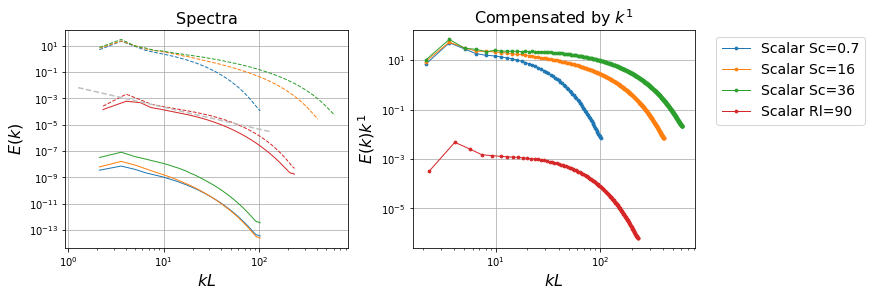

In [20]:
fig, ax = plt.subplots(ncols=2, nrows=1, constrained_layout=True, figsize=(12,4))

for i,simu in enumerate(simulations) :
    xscaling = simu['L']
    #xscaling = 1.0
    ax[0].plot(simu['vel_k']*xscaling, simu['vel_spec']*4.0*np.pi*(simu['vel_k']**2)/simu['vel_nb_of_modes'], '-', lw=1.0, markersize=5.5, color=colors[i], label='Velocity')
    ax[0].plot(simu['k']*xscaling, simu['scal_spec']*4.0*np.pi*(simu['k']**2)/simu['nb_of_modes'], '--', lw=1.0, markersize=5.5, color=colors[i], label='Scalar %2.0f' % i)
    
    #ax[1].plot(simu['vel_k']*xscaling, simu['vel_spec']*4.0*np.pi*(simu['vel_k']**2)/simu['vel_nb_of_modes']*(simu['vel_k']**(5.0/3.0)), '-', lw=1.0, markersize=5.5, color=colors[i], label='Velocity ' + simu['label'])
    ax[1].plot(simu['k']*xscaling, simu['scal_spec']*4.0*np.pi*(simu['k']**2)/simu['nb_of_modes']*(simu['k']**(1)), '.-', lw=1.0, markersize=5.5, color=colors[i], label='Scalar ' + simu['label'])
ax[0].plot(simu['k'], 1e-2*simu['k']**(-5.0/3.0), 'k--', label=r'$k^{-5/3}$', color='silver')
ax[0].set(xscale='log', yscale='log', xlabel=r'$kL$', ylabel=r'$E(k)$', title=r'Spectra'); ax[0].grid()
ax[1].set(xscale='log', yscale='log', xlabel=r'$kL$', ylabel=r'$E(k)k^{1}$', title=r'Compensated by $k^1$'); ax[1].grid()
lgd = ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# pp = PdfPages('../Images/Scalar/spec_scalar_compens_eps43_N192_diff_u.pdf')
# pp.savefig(bbox_extra_artists=lgd,), bbox_inches='tight')
# pp.close()

plt.show()

# Correlation fit

In [21]:
def poly_gaussian(x, a, b, c):   
    return np.exp(-a * (x)**2.0 + b*x + c) 
def poly_gaussian_jacobian(x, a, b, c):   
    return np.transpose([-(x**2.0)*np.exp(-a * (x)**2.0 +b*x + c), x*np.exp(-a * (x)**2.0 + b*x + c) ,np.exp(-a * (x)**2.0 + b*x + c)])

def simple_gaussian(x, a, c):   
    return np.exp(-a * (x)**2.0 + c) 
def simple_gaussian_jacobian(x, a, c):   
    return np.transpose([-(x**2.0)*np.exp(-a * (x)**2.0 + c), np.exp(-a * (x)**2.0 + c)])

def simple_exp(x, a, c):   
    return np.exp(-a * x + c) 
def simple_exp_jacobian(x, a, c):   
    return np.transpose([-x*np.exp(-a * x + c), np.exp(-a * x + c)])

def linear_fun(x, a, b):   
    return (a * x + b) 
def linear_jacobian(x, a, b):   
    return np.transpose([x, np.ones_like(x)])

## Fitting (iterative method)

Fitting the scalars correlations function $f(x) = \exp\{-a x^2 +b x + c \}$ 
with $x = t/\tau_0$, $y = C^2(t,k)/C^2(t=0,k)$ :

In [22]:
tk_end_fit = 1.5
nb_of_params = 2
for simu in simulations :
    simu['fit_coef'] = np.zeros((len(simu['k']), nb_of_params), dtype=float); simu['fit_coef_error'] = np.zeros((len(simu['k']), nb_of_params), dtype=float)
    simu['chi2'] = np.zeros(len(simu['k']), dtype=float)
    for ik, k in enumerate(simu['k']) :
        xdata = simu['scalar_t'][1:]/simu['t0']
        ydata = (simu['scalar_corr'][1:,ik])/simu['scalar_corr'][1,ik]
        #a = np.searchsorted(xdata, 0.0)
        a = 1
        b = np.searchsorted(xdata*k*simu['L'], tk_end_fit)
        if ((b-a) > 3) :
            coef, covar = curve_fit(simple_gaussian, xdata[a:b], ydata[a:b], jac=simple_gaussian_jacobian, absolute_sigma=False)
            simu['fit_coef'][ik] = coef
            simu['fit_coef_error'][ik] = np.sqrt(np.diagonal(covar))
            simu['chi2'][ik] = np.sum((ydata-simple_gaussian(xdata,*coef))**2)

Fitting the velocity correlations functions :

In [23]:
for simu in simulations :
    simu['vel_fit_coef'] = np.zeros((len(simu['vel_k']), nb_of_params), dtype=float); simu['vel_fit_coef_error'] = np.zeros((len(simu['vel_k']), nb_of_params), dtype=float)
    simu['vel_fit_chi2'] = np.zeros(len(simu['vel_k']), dtype=float)
    for ik, k in enumerate(simu['vel_k']) :
        xdata = simu['vel_t']/simu['t0']
        ydata = simu['vel_corr'][:,ik]/simu['vel_corr'][0,ik]
        a = 0
        b = np.searchsorted(xdata*k*simu['L'], tk_end_fit)
        if ((b-a) > 3) :
            coef, covar = curve_fit(simple_gaussian, xdata[a:b], ydata[a:b], jac=simple_gaussian_jacobian, absolute_sigma=False)
            simu['vel_fit_coef'][ik] = coef
            simu['vel_fit_coef_error'][ik] = np.sqrt(np.diagonal(covar))
            simu['vel_fit_chi2'][ik] = np.sum((ydata-simple_gaussian(xdata,*coef))**2)

Plot results of fitting :

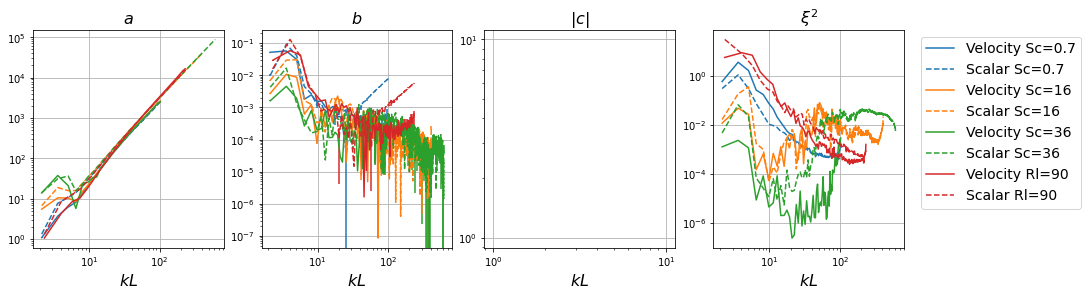

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=4, constrained_layout=True,figsize=(15,4))

for i,simu in enumerate(simulations) : 
    xscaling = simu['L']
    ax[0].errorbar(simu['vel_k']*xscaling, simu['vel_fit_coef'][:,0], yerr=simu['vel_fit_coef_error'][:,0],errorevery=5, color=colors[i])
    ax[1].errorbar(simu['vel_k']*xscaling, np.abs(simu['vel_fit_coef'][:,1]), yerr=simu['vel_fit_coef_error'][:,1],errorevery=5, color=colors[i])
    #ax[2].errorbar(simu['k']*xscaling, np.abs(simu['vel_fit_coef'][:,2]), yerr=simu['vel_fit_coef_error'][:,1],errorevery=5, color=colors[i])
    ax[3].plot(simu['vel_k']*xscaling, simu['vel_fit_chi2'], label='Velocity ' + simu['label'], color=colors[i])
    ax[0].errorbar(simu['k']*xscaling, simu['fit_coef'][:,0], yerr=simu['fit_coef_error'][:,0],errorevery=5, ls='--', color=colors[i])
    ax[1].errorbar(simu['k']*xscaling, np.abs(simu['fit_coef'][:,1]), yerr=simu['fit_coef_error'][:,1],errorevery=5, ls='--', color=colors[i])
    #ax[2].errorbar(simu['k']*xscaling, np.abs(simu['fit_coef'][:,2]), yerr=simu['fit_coef_error'][:,2],errorevery=5, ls='--', color=colors[i])
    ax[3].plot(simu['k']*xscaling, simu['chi2'], label='Scalar ' + simu['label'], ls='--', color=colors[i])
ax[0].set(xlabel=r'$kL$', title=r'$a$', yscale='log', xscale='log'); ax[0].grid()
ax[1].set(xlabel=r'$kL$', title=r'$b$', yscale='log', xscale='log'); ax[1].grid()
ax[2].set(xlabel=r'$kL$', title=r'$|c|$', yscale='log', xscale='log'); ax[2].grid()
ax[3].set(xlabel=r'$kL$', title=r'$\xi^2$', yscale='log', xscale='log'); ax[3].grid()
ax[3].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# Physical fields

In [25]:
import h5py

In [26]:
for simu in simulations :
    # Read scalar field
    try :
        scal = np.empty([simu['N'], simu['N'], simu['N']])
        file_name = common_folder + simu['folder'] + 'run1/' + 'ScalarS1_' + "%06d" % simu['h5_ite'] + '.h5'
        print('Reading file' + file_name)
        file = h5py.File(file_name, 'r')
        simu['scal_field'] = file['ScalarS1'][:,:] # copy the file data into a numpy array
        file.close()
    except : 
        simu['scal_field'] = np.zeros((simu['N'],simu['N'],simu['N']))
    # Read velocity fields
    try :
        scal = np.empty([simu['N'], simu['N'], simu['N']])
        file_name = common_folder + simu['folder'] + 'run1/' + 'U_' + "%06d" % simu['h5_ite'] + '.h5'
        file = h5py.File(file_name, 'r')
        print('Reading file' + file_name)
        simu['U'] = file['U'][:,:] # copy the file data into a numpy array
        file.close()
    except : 
        simu['U'] = np.zeros((simu['N'],simu['N'],simu['N']))

Reading file/home/gorbunov8a/data/scalar/N128/Rl60_Sc07/run1/ScalarS1_500000.h5
Reading file/home/gorbunov8a/data/scalar/N128/Rl60_Sc07/run1/U_500000.h5
Reading file/home/gorbunov8a/data/scalar/N128/Rl60_Sc16/run1/ScalarS1_055000.h5
Reading file/home/gorbunov8a/data/scalar/N128/Rl60_Sc36/run1/ScalarS1_055000.h5
Reading file/home/gorbunov8a/data/scalar/N256/Rl90_Sc07/old/run1/ScalarS1_135000.h5
Reading file/home/gorbunov8a/data/scalar/N256/Rl90_Sc07/old/run1/U_135000.h5


/tmp/ipykernel_7569/3494195987.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax[0].pcolormesh(x_scal, x_scal, simu['scal_field'][x_cut, :,:], cmap='jet')
/tmp/ipykernel_7569/3494195987.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax[1].pcolormesh(x_scal, x_scal, simu['U'][x_cut, :,:], cmap='jet')


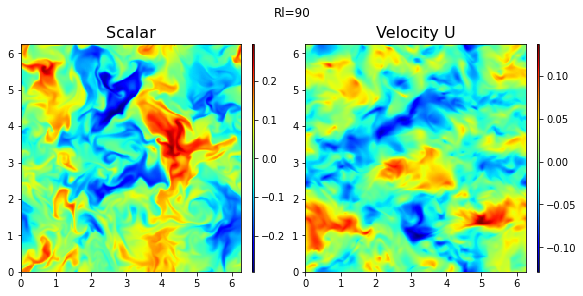

In [27]:
simu = simulations[-1]
x_scal = 2.0*np.pi/simu['N']*np.arange(0,simu['N'])
x_cut=40

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4), constrained_layout=True)
fig.suptitle(simu['label'])
im = ax[0].pcolormesh(x_scal, x_scal, simu['scal_field'][x_cut, :,:], cmap='jet')
ax[0].set(xscale='linear', yscale='linear', title='Scalar')
fig.colorbar(im, ax=ax[0], aspect=100)

im = ax[1].pcolormesh(x_scal, x_scal, simu['U'][x_cut, :,:], cmap='jet')
ax[1].set(xscale='linear', yscale='linear', title='Velocity U')
fig.colorbar(im, ax=ax[1], aspect=100)

#plt.savefig("../Images/Scalar/fields_eps43_N192_diff_u.png", dpi=150, format="png")
plt.show()

# Plots for paper

In [28]:
bw_cycler = cycler(marker=["o", "s", "^", "*", "D"])
plt.rc('axes', prop_cycle=bw_cycler)

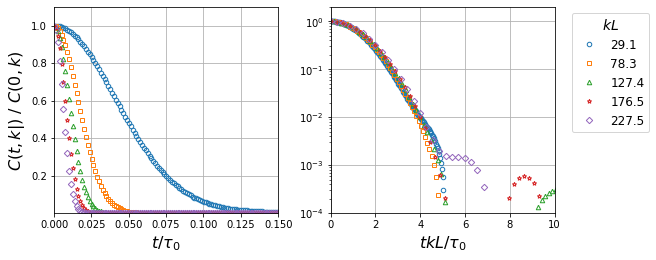

In [29]:
simu = simulations[-1]
fig, ax = plt.subplots(nrows=1, ncols=2, constrained_layout=True,figsize=(9,3.5))
for i,ik in enumerate(simu['indices_of_k_to_plot_bw'][:]) :
    scaling = 1.0/simu['t0']
    ax[0].plot(simu['scalar_t']*scaling, simu['scalar_corr'][:,ik]/simu['scalar_corr'][0,ik], label=r'%2.1f' % (simu['k'][ik]*simu['L']), \
               ls="", fillstyle='none', ms=4.5, color=colors[i], markevery=2)
    #ax[0].plot(simu['scalar_t']*scaling, np.exp(-simu['fit_coef'][ik][0]*(simu['scalar_t']/simu['t0'])**2 + simu['fit_coef'][ik][1]), '-', lw = 0.75, color=colors[i])
    scaling = simu['k'][ik]*simu['L']/simu['t0']
    ax[1].plot(simu['scalar_t']*scaling, simu['scalar_corr'][:,ik]/simu['scalar_corr'][0,ik], label=r'%2.1f' % (simu['k'][ik]*simu['L']), \
               ls="", fillstyle='none', ms=4.5, color=colors[i], markevery=2)
    #ax[1].plot(simu['scalar_t']*scaling, np.exp(-simu['fit_coef'][ik][0]*(simu['scalar_t']/simu['t0'])**2 + simu['fit_coef'][ik][1]), '-', lw = 0.75, color=colors[i])
ax[0].set(xscale='linear',yscale='linear', xlabel=r'$t/\tau_0$', ylabel=r'$C(t,k|) \ / \ C(0,k)$'); ax[0].grid()
ax[1].set(xscale='linear',yscale='log', xlabel=r'$t k L/\tau_0$'); ax[1].grid()

ax[0].set(xlim=[0,0.15], ylim=[0.0001,1.1])
ax[1].set(xlim=[0,10.0], ylim=[0.0001,2])
lgd = ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=r'$k L$', title_fontsize=14, fontsize=12)

# pp = PdfPages('/home/gorbunov8a/Documents/Latex/these/Figures/scalarCorrNs.pdf')
# pp.savefig(bbox_extra_artists=(lgd,), bbox_inches='tight')
# pp.close()
#get_plot_data_blocks(ax[1],'fig43b_k=')

plt.show()

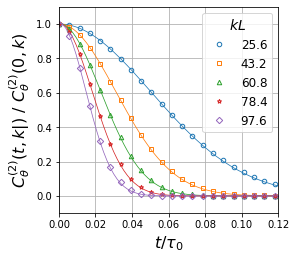

In [30]:
simu = simulations[0]
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True,figsize=(4,3.5))
for i,ik in enumerate(simu['indices_of_k_to_plot_bw'][:]) :
    scaling = 1.0/simu['t0']
    ax.plot(simu['scalar_t']*scaling, simu['scalar_corr'][:,ik]/simu['scalar_corr'][0,ik], label=r'%2.1f' % (simu['k'][ik]*simu['L']), \
               ls="", fillstyle='none', ms=4.5, color=colors[i], markevery=3)
    ax.plot(simu['scalar_t']*scaling, np.exp(-simu['fit_coef'][ik][0]*(simu['scalar_t']/simu['t0'])**2 + simu['fit_coef'][ik][1]), '-', lw = 0.75, color=colors[i])
ax.set(xscale='linear',yscale='linear', xlabel=r'$t/\tau_0$', ylabel=r'$C^{(2)}_\theta(t,k|) \ / \ C^{(2)}_\theta(0,k)$'); ax.grid()
ax.set(xlim=[0,0.12], ylim=[-0.1,1.1])
lgd = ax.legend(title=r'$k L$', title_fontsize=14, fontsize=12)

# pp = PdfPages('/home/gorbunov8a/Documents/Latex/these_overleaf/60ed6b1cd4de842e8afa5cb1/Figures/scalarCorrNs1pic.pdf')
# pp.savefig(bbox_extra_artists=(lgd,), bbox_inches='tight')
# pp.close()
#get_plot_data_blocks(ax[1],'fig43b_k=')

plt.show()

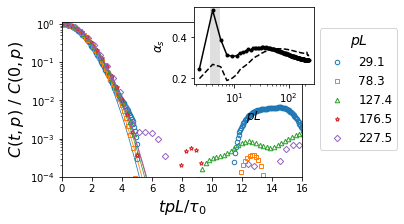

In [31]:
simu = simulations[-1]
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True,figsize=(5.5,3))
for i,ik in enumerate(simu['indices_of_k_to_plot_bw'][:]) :
    scaling = simu['k'][ik]*simu['L']/simu['t0']
    ax.plot(simu['scalar_t']*scaling, simu['scalar_corr'][:,ik]/simu['scalar_corr'][0,ik], label=r'%2.1f' % (simu['k'][ik]*simu['L']), \
               ls="", fillstyle='none', ms=4.5, color=colors[i], markevery=3)
    ax.plot(simu['scalar_t']*scaling, np.exp(-simu['fit_coef'][ik][0]*(simu['scalar_t']/simu['t0'])**2 + simu['fit_coef'][ik][1]), '-', lw = 0.75, color=colors[i])
ax.set(xscale='linear',yscale='log', xlabel=r'$t p L/\tau_0$', ylabel=r'$C(t,p) \ / \ C(0,p)$'); ax.grid(False)

ax.set(xlim=[0,16.0], ylim=[0.0001,1.1])
lgd = ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=r'$p L$', title_fontsize=14, fontsize=12)

axins = ax.inset_axes([0.55, 0.6, 0.5, 0.50])
axins.tick_params(axis='x', labelsize=10)
xscaling = simu['L']
axins.plot(simu['k']*xscaling, (simu['vel_fit_coef'][:,0])/(simu['k']*xscaling)**2, '--', label='Velocity')
axins.plot(simu['k']*xscaling, (simu['fit_coef'][:,0])/(simu['k']*xscaling)**2, '.-', label='Scalar')
axins.axvspan(2.0*xscaling, 3.0*xscaling, facecolor='grey', alpha=0.25)
axins.set_ylabel(r'$\alpha_s$', fontsize=12)
axins.set_xlabel(r'$pL$', fontsize=12)
#ax.text(2.5*xscaling, 0.32, "Forcing", {'color': 'black', 'fontsize': 13},horizontalalignment='center',verticalalignment='center',rotation=90,clip_on=False)
axins.set(xscale='log', yscale='linear'); axins.grid(False)

# pp = PdfPages('/home/gorbunov8a/Documents/Latex/Papers/paper-prl-scalar/figures/scalarCorrNs.pdf')
# pp.savefig(bbox_extra_artists=(lgd,), bbox_inches='tight')
# pp.close()

plt.show()

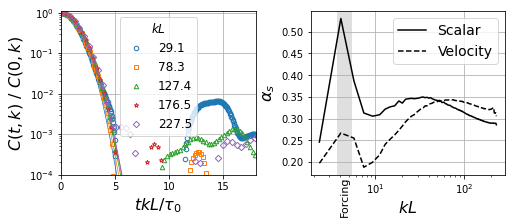

In [32]:
simu = simulations[-1]
fig, ax = plt.subplots(nrows=1, ncols=2, constrained_layout=True,figsize=(7,3))
for i,ik in enumerate(simu['indices_of_k_to_plot_bw'][:]) :
    scaling = simu['k'][ik]*simu['L']/simu['t0']
    ax[0].plot(simu['scalar_t']*scaling, simu['scalar_corr'][:,ik]/simu['scalar_corr'][0,ik], label=r'%2.1f' % (simu['k'][ik]*simu['L']), \
               ls="", fillstyle='none', ms=4.5, color=colors[i], markevery=3)
    ax[0].plot(simu['scalar_t']*scaling, np.exp(-simu['fit_coef'][ik][0]*(simu['scalar_t']/simu['t0'])**2 + simu['fit_coef'][ik][1]), '-', lw = 0.75, color=colors[i])
ax[0].set(xscale='linear',yscale='log', xlabel=r'$t k L/\tau_0$', ylabel=r'$C(t,k) \ / \ C(0,k)$'); ax[0].grid()
ax[0].set(xlim=[0,18.0], ylim=[0.0001,1.1])
ax[0].legend(title=r'$k L$', title_fontsize=12, fontsize=12)
    
xscaling = simu['L']
ax[1].plot(simu['k']*xscaling, (simu['fit_coef'][:,0])/(simu['k']*xscaling)**2, '-', label='Scalar')
ax[1].plot(simu['k']*xscaling, (simu['vel_fit_coef'][:,0])/(simu['k']*xscaling)**2, '--', label='Velocity')
ax[1].axvspan(2.0*xscaling, 3.0*xscaling, facecolor='grey', alpha=0.25)
ax[1].text(2.5*xscaling, 0.12, "Forcing", {'color': 'black', 'fontsize': 11},horizontalalignment='center',verticalalignment='center',rotation=90,clip_on=False)
ax[1].set(xlabel=r'$kL$', ylabel=r'$\alpha_s$', xscale='log', yscale='linear'); ax[1].grid()
ax[1].legend(fontsize=14)

# pp = PdfPages('/home/gorbunov8a/Documents/Latex/Papers/paper-prl-scalar/figures/scalarCorrNsUPD.pdf')
# pp.savefig(bbox_extra_artists=(lgd,), bbox_inches='tight')
# pp.close()

plt.show()

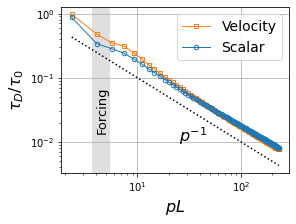

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True,figsize=(4,3))
simu = simulations[-1]
xscaling = simu['L']
ax.plot(simu['vel_k']*xscaling, (simu['vel_fit_coef'][:,0])**(-0.5), 's-', label='Velocity', ms=4.5, fillstyle='none', lw=1.0, color=colors[1])
ax.plot(simu['k']*xscaling, (simu['fit_coef'][:,0])**(-0.5), 'o-', label='Scalar', ms=4.5, fillstyle='none', lw=1.0, color=colors[0])
ax.plot(simu['k']*xscaling, (simu['k']*xscaling)**(-1.0), ':')
ax.axvspan(2.0*xscaling, 3.0*xscaling, facecolor='grey', alpha=0.25)
ax.text(2.5*xscaling, 0.032, "Forcing", {'color': 'black', 'fontsize': 13},horizontalalignment='center',verticalalignment='center',rotation=90,clip_on=False)
ax.set(xlabel=r'$pL$', ylabel=r'$\tau_D/\tau_0$', xscale='log', yscale='log'); ax.grid()
ax.annotate(r'$p^{-1}}$', xy=(25, 0.01), xycoords='data', size='16')
lgd = ax.legend()

# pp = PdfPages('/home/gorbunov8a/Documents/Latex/Papers/paper-prl-scalar/figures/scalarCorrNsDecorrTime.pdf')
# pp.savefig(bbox_inches='tight')
# pp.close()

plt.show()

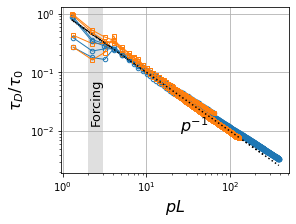

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True,figsize=(4,3))

xscaling = 1.0

for i,simu in enumerate(simulations) : 
    ax.plot(simu['k']*xscaling, (simu['fit_coef'][:,0])**(-0.5), 'o-', label='Scalar', ms=4.5, fillstyle='none', lw=1.0, color=colors[0])
    ax.plot(simu['vel_k']*xscaling, (simu['vel_fit_coef'][:,0])**(-0.5), 's-', label='Velocity', ms=4.5, fillstyle='none', lw=1.0, color=colors[1])
    ax.plot(simu['k']*xscaling, (simu['k']*xscaling)**(-1.0), ':')
ax.axvspan(2.0*xscaling, 3.0*xscaling, facecolor='grey', alpha=0.25)
ax.text(2.5*xscaling, 0.032, "Forcing", {'color': 'black', 'fontsize': 13},horizontalalignment='center',verticalalignment='center',rotation=90,clip_on=False)
ax.set(xlabel=r'$pL$', ylabel=r'$\tau_D/\tau_0$', xscale='log', yscale='log'); ax.grid()
ax.annotate(r'$p^{-1}}$', xy=(25, 0.01), xycoords='data', size='16')
#lgd = ax.legend()

# pp = PdfPages('/home/gorbunov8a/Documents/Latex/Papers/paper-prl-scalar/figures/scalarCorrNsDecorrTime.pdf')
# pp.savefig(bbox_inches='tight')
# pp.close()

plt.show()

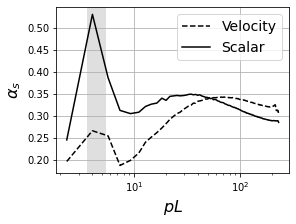

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True,figsize=(4,3))
simu=simulations[-1]
xscaling = simu['L']
ax.plot(simu['k']*xscaling, (simu['vel_fit_coef'][:,0])/(simu['k']*xscaling)**2, '--', label='Velocity')
ax.plot(simu['k']*xscaling, (simu['fit_coef'][:,0])/(simu['k']*xscaling)**2, '-', label='Scalar')
ax.axvspan(2.0*xscaling, 3.0*xscaling, facecolor='grey', alpha=0.25)
#ax.text(2.5*xscaling, 0.32, "Forcing", {'color': 'black', 'fontsize': 13},horizontalalignment='center',verticalalignment='center',rotation=90,clip_on=False)
ax.set(xlabel=r'$pL$', ylabel=r'$\alpha_s$', xscale='log', yscale='linear'); ax.grid()

lgd = ax.legend()
#pp = PdfPages('/home/gorbunov8a/Documents/Latex/Papers/paper-prl-scalar/figures/scalarCorrNsAlpha.pdf')
#pp.savefig(bbox_inches='tight')
#pp.close()
plt.show()

/tmp/ipykernel_7569/562911677.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax[0].pcolormesh(x_scal, x_scal, simu['scal_field'][x_cut, :,:], cmap='jet')
/tmp/ipykernel_7569/562911677.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax[1].pcolormesh(x_scal, x_scal, simu['U'][x_cut, :,:], cmap='jet')


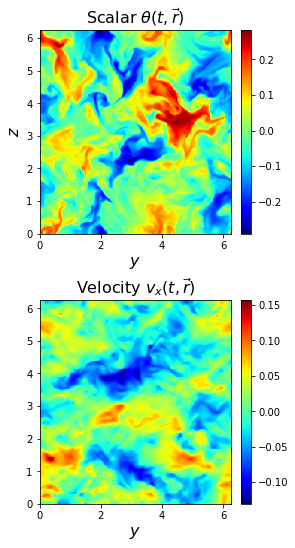

In [36]:
simu = simulations[-1]
x_scal = 2.0*np.pi/simu['N']*np.arange(0,simu['N'])
x_cut=50

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(4.0,7.5), constrained_layout=True)
im = ax[0].pcolormesh(x_scal, x_scal, simu['scal_field'][x_cut, :,:], cmap='jet')
fig.colorbar(im, ax=ax[0])
im = ax[1].pcolormesh(x_scal, x_scal, simu['U'][x_cut, :,:], cmap='jet')
fig.colorbar(im, ax=ax[1])

ax[0].set(xscale='linear', yscale='linear', title=r'Scalar $\theta(t,\vec{r})$', xlabel=r'$y$', ylabel=r'$z$')
ax[1].set(xscale='linear', yscale='linear', title=r'Velocity $v_x(t,\vec{r})$', xlabel=r'$y$')

#plt.savefig("/home/gorbunov8a/Documents/Latex/Papers/paper-prl-scalar/figures/scalarCorrNsFields.png", dpi=150, format="png")
plt.show()

/tmp/ipykernel_7569/2458612942.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax[0].pcolormesh(x_scal, x_scal, simu['scal_field'][x_cut, :,:], cmap='bone')
/tmp/ipykernel_7569/2458612942.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax[1].pcolormesh(x_scal, x_scal, simu['U'][x_cut, :,:], cmap='bone')


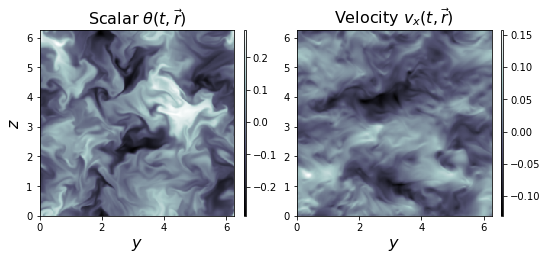

In [37]:
simu = simulations[-1]
x_scal = 2.0*np.pi/simu['N']*np.arange(0,simu['N'])
x_cut=50

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7.5,3.5), constrained_layout=True)
im = ax[0].pcolormesh(x_scal, x_scal, simu['scal_field'][x_cut, :,:], cmap='bone')
fig.colorbar(im, ax=ax[0], aspect=100)
im = ax[1].pcolormesh(x_scal, x_scal, simu['U'][x_cut, :,:], cmap='bone')
fig.colorbar(im, ax=ax[1], aspect=100)

ax[0].set(xscale='linear', yscale='linear', title=r'Scalar $\theta(t,\vec{r})$', xlabel=r'$y$', ylabel=r'$z$')
ax[1].set(xscale='linear', yscale='linear', title=r'Velocity $v_x(t,\vec{r})$', xlabel=r'$y$')
#plt.savefig("/home/gorbunov8a/Documents/Latex/these/Figures/scalarCorrNsFields.png", dpi=150, format="png")
plt.show()

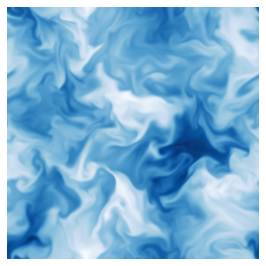

In [38]:
fig = plt.figure(frameon=False)
fig.set_size_inches(3.5,3.5)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(simulations[-1]['scal_field'][x_cut, :,:], cmap='Blues', aspect='auto')
plt.savefig("../Images/scalarbckgrnd.png", dpi=150, format="png")
plt.show()

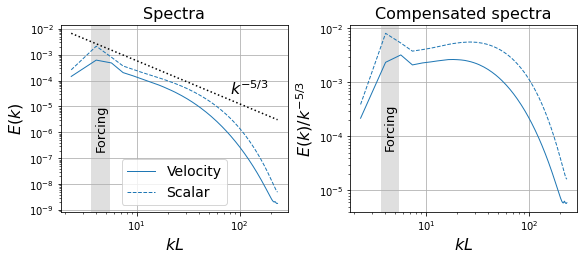

In [39]:
fig, ax = plt.subplots(ncols=2, nrows=1, constrained_layout=True, figsize=(8,3.5))

simu=simulations[-1]; i = 0
xscaling = simu['L']
#xscaling = 1.0
ax[0].plot(simu['vel_k']*xscaling, simu['vel_spec']*4.0*np.pi*(simu['vel_k']**2)/simu['vel_nb_of_modes'], '-', lw=1.0, markersize=3.5, color=colors[i], label='Velocity')
ax[0].plot(simu['k']*xscaling, simu['scal_spec']*4.0*np.pi*(simu['k']**2)/simu['nb_of_modes'], '--', lw=1.0, markersize=3.5, color=colors[i], label='Scalar')


ax[1].plot(simu['vel_k']*xscaling, simu['vel_spec']*4.0*np.pi*(simu['vel_k']**2)/simu['vel_nb_of_modes']*(simu['vel_k']**(5.0/3.0)), '-', lw=1.0, markersize=5.5, color=colors[i], label='Velocity')
ax[1].plot(simu['k']*xscaling, simu['scal_spec']*4.0*np.pi*(simu['k']**2)/simu['nb_of_modes']*(simu['k']**(5.0/3.0)), '--', lw=1.0, markersize=5.5, color=colors[i], label='Scalar')
ax[0].plot(simu['k']*xscaling, 1e-2*simu['k']**(-5.0/3.0), 'k:')
ax[0].annotate(r'$k^{-5/3}}$', xy=(80, 3e-5), xycoords='data', size='16')
ax[0].axvspan(2.0*xscaling, 3.0*xscaling, facecolor='gray', alpha=0.25)
ax[0].text(2.5*xscaling, 15e-7, "Forcing", {'color': 'black', 'fontsize': 13},horizontalalignment='center',verticalalignment='center',rotation=90,clip_on=False)
ax[1].axvspan(2.0*xscaling, 3.0*xscaling, facecolor='gray', alpha=0.25)
ax[1].text(2.5*xscaling, 15e-5, "Forcing", {'color': 'black', 'fontsize': 13},horizontalalignment='center',verticalalignment='center',rotation=90,clip_on=False)

ax[0].set(xscale='log', yscale='log', xlabel=r'$kL$', ylabel=r'$E(k)$', title=r'Spectra'); ax[0].grid()
ax[1].set(xscale='log', yscale='log', xlabel=r'$kL$', ylabel=r'$E(k)/k^{-5/3}$', title=r'Compensated spectra'); ax[1].grid()
lgd = ax[0].legend(loc='best')
# pp = PdfPages('/home/gorbunov8a/Documents/Latex/these/Figures/spectraRealScalar.pdf')
# pp.savefig(bbox_inches='tight')
# pp.close()

plt.show()

In [40]:
# fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True,figsize=(4,3.5))

# xscaling = simu['L']

# for i,simu in enumerate(simulations) : 
#     ax.plot(simu['k']*xscaling, (simu['fit_coef'][:,0])**(-0.5), 'o-', marker='', fillstyle='none', lw=1.0, color=colors[i], label='Scalar $R_\lambda$=%2.0f, $Sc$=%2.1f' % (simu['Rl'],simu['Sc']))
# for i,simu in enumerate([simulations[0],simulations[-1]]) : 
#     ax.plot(simu['vel_k']*xscaling, (simu['vel_fit_coef'][:,0])**(-0.5), '--', marker='', ms=4.5, fillstyle='none', lw=1.0, color=colors[5*i], label='Velocity $R_\lambda$=%2.0f' % simu['Rl'])
# ax.axvspan(2.0*xscaling, 3.0*xscaling, facecolor='grey', alpha=0.25)
    
# ax.plot(simulations[4]['k']*xscaling, 5*(simulations[4]['k']*xscaling)**(-1.0), 'k-', lw=1)
# ax.text(2.5*xscaling, 0.032, "Forcing", {'color': 'black', 'fontsize': 13},horizontalalignment='center',verticalalignment='center',rotation=90,clip_on=False)
# ax.set(xlabel=r'$kL$', ylabel=r'$\tau_D/\tau_0$', xscale='log', yscale='log'); ax.grid()
# ax.annotate(r'$k^{-1}}$', xy=(25, 0.3), xycoords='data', size='16')

# # pp = PdfPages('/home/gorbunov8a/Documents/Latex/these_overleaf/60ed6b1cd4de842e8afa5cb1/Figures/scalarCorrNsDecorrTime.pdf')
# # pp.savefig(bbox_inches='tight')
# # pp.close()
# #get_plot_data_blocks(ax,'fig44a')
# plt.show()

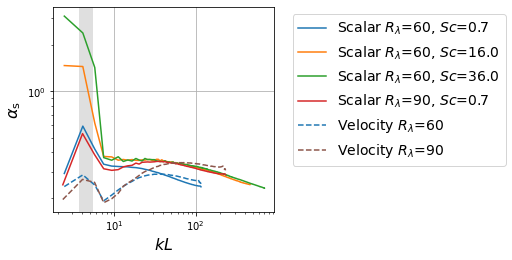

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True,figsize=(7,3.5))

xscaling = simu['L']
sl=np.s_[0:]
for i,simu in enumerate(simulations) :
    ax.plot(simu['k'][sl]*xscaling, (simu['fit_coef'][sl,0]/(simu['k'][sl]*simu['L'])**2), '-', label='Scalar $R_\lambda$=%2.0f, $Sc$=%2.1f' % (simu['Rl'],simu['Sc']), fillstyle='none', lw=1.5, color=colors[i])
for i,simu in enumerate([simulations[0],simulations[-1]]) : 
    ax.plot(simu['vel_k'][sl]*xscaling, (simu['vel_fit_coef'][sl,0]/(simu['vel_k'][sl]*simu['L'])**2), '--', label='Velocity $R_\lambda$=%2.0f' % simu['Rl'], fillstyle='none', lw=1.5, color=colors[5*i])
ax.axvspan(2.0*xscaling, 3.0*xscaling, facecolor='grey', alpha=0.25)
    
ax.set(xlabel=r'$kL$', ylabel=r'$\alpha_{\rm s}$', xscale='log', yscale='log'); ax.grid()
lgd = ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# pp = PdfPages('/home/gorbunov8a/Documents/Latex/these_overleaf/60ed6b1cd4de842e8afa5cb1/Figures/scalarCrrNsFit.pdf')
# pp.savefig(bbox_inches='tight')
# pp.close()
#get_plot_data_blocks(ax,'fig44b')
plt.show()

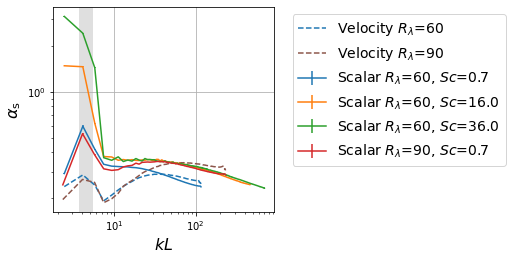

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True,figsize=(7,3.5))

xscaling = simu['L']
sl=np.s_[0:]
for i,simu in enumerate(simulations) :
    y_coef = 1.0/(simu['k'][sl]*simu['L'])**2
    ax.errorbar(simu['k'][sl]*xscaling, simu['fit_coef'][sl,0]*y_coef, yerr=simu['fit_coef_error'][sl,0]*y_coef, ms=0, label='Scalar $R_\lambda$=%2.0f, $Sc$=%2.1f' % (simu['Rl'],simu['Sc']), color=colors[i])
for i,simu in enumerate([simulations[0],simulations[-1]]) : 
    ax.plot(simu['vel_k'][sl]*xscaling, (simu['vel_fit_coef'][sl,0]/(simu['vel_k'][sl]*simu['L'])**2), '--', label='Velocity $R_\lambda$=%2.0f' % simu['Rl'], fillstyle='none', lw=1.5, color=colors[5*i])
ax.axvspan(2.0*xscaling, 3.0*xscaling, facecolor='grey', alpha=0.25)
    
ax.set(xlabel=r'$kL$', ylabel=r'$\alpha_{\rm s}$', xscale='log', yscale='log'); ax.grid()
lgd = ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# pp = PdfPages('/home/gorbunov8a/Documents/Latex/these_overleaf/60ed6b1cd4de842e8afa5cb1/Figures/scalarCrrNsFit.pdf')
# pp.savefig(bbox_inches='tight')
# pp.close()
#get_plot_data_blocks(ax,'fig44b')
plt.show()

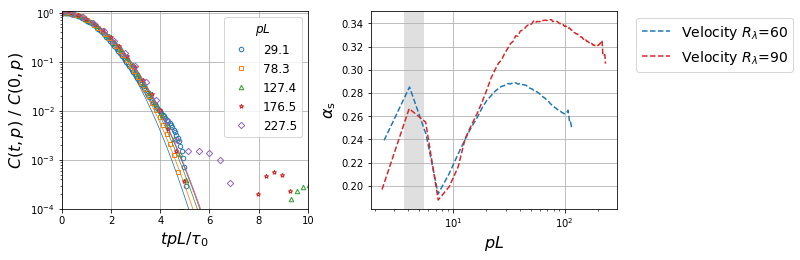

In [43]:
simu = simulations[-1]
fig, ax = plt.subplots(nrows=1, ncols=2, constrained_layout=True,figsize=(11,3.5))
for i,ik in enumerate(simu['indices_of_k_to_plot_bw'][:]) :
    scaling = simu['k'][ik]*simu['L']/simu['t0']
    ax[0].plot(simu['scalar_t']*scaling, simu['scalar_corr'][:,ik]/simu['scalar_corr'][0,ik], label=r'%2.1f' % (simu['k'][ik]*simu['L']), \
               ls="", fillstyle='none', ms=4.5, color=colors[i], markevery=3)
    ax[0].plot(simu['scalar_t']*scaling, np.exp(-simu['fit_coef'][ik][0]*(simu['scalar_t']/simu['t0'])**2 + simu['fit_coef'][ik][1]), '-', lw = 0.75, color=colors[i])
ax[0].set(xscale='linear',yscale='log', xlabel=r'$t p L/\tau_0$', ylabel=r'$C(t,p) \ / \ C(0,p)$'); ax[0].grid()
ax[0].set(xlim=[0,10.0], ylim=[0.0001,1.1])
ax[0].legend(title=r'$p L$', title_fontsize=12, fontsize=12)
    
xscaling = simu['L']
sl=np.s_[0:]
#for i,simu in enumerate(simulations) :
#    ax[1].plot(simu['k'][sl]*xscaling, (simu['fit_coef'][sl,0]/(simu['k'][sl]*simu['L'])**2), '-', label='Scalar $R_\lambda$=%2.0f, $Sc$=%2.1f' % (simu['Rl'],simu['Sc']), fillstyle='none', lw=1.5, color=colors[i])
for i,simu in enumerate([simulations[0],simulations[-1]]) : 
    ax[1].plot(simu['vel_k'][sl]*xscaling, (simu['vel_fit_coef'][sl,0]/(simu['vel_k'][sl]*simu['L'])**2), '--', label='Velocity $R_\lambda$=%2.0f' % simu['Rl'], fillstyle='none', lw=1.5, color=colors[3*i])
ax[1].axvspan(2.0*xscaling, 3.0*xscaling, facecolor='grey', alpha=0.25)
    
ax[1].set(xlabel=r'$pL$', ylabel=r'$\alpha_{\rm s}$', xscale='log', yscale='linear'); ax[1].grid()
lgd = ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# pp = PdfPages('/home/gorbunov8a/Documents/Latex/Papers/paper-prl-scalar/figures/scalarCorrNsUPD_linear.pdf')
# pp.savefig(bbox_extra_artists=(lgd,), bbox_inches='tight')
# pp.close()

plt.show()